Muh. Ilham Saputra J

Nim H071201075

Final MK Machine Learning (kelas A)

# Importing the Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

gold_data = pd.read_csv('/content/gld_price_data.csv')

# Data Collection and Processing

In [2]:
#print 5 baris teratas

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
#print 5 baris terbawah

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
#print jumlah baris dan kolom

gold_data.shape

(2290, 6)

In [5]:
#informasi tentang data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#mengecek ada tidaknya nilai yang kosong

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#statistical measure

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


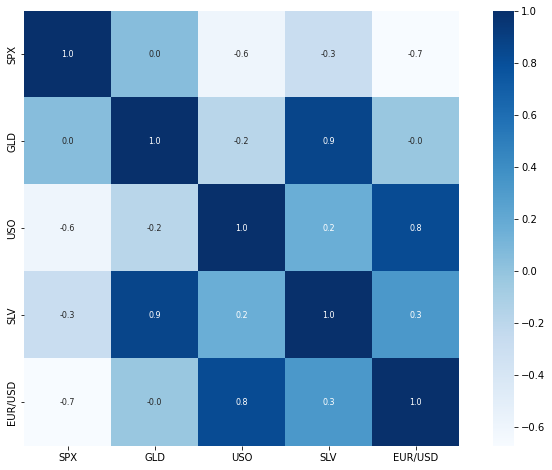

In [8]:
#mengecek korelasi antar value

plt.figure(figsize = (12,8))
correlation = gold_data.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, 
            annot_kws={'size':8}, cmap='Blues')

In [9]:
#nilai korelasi GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


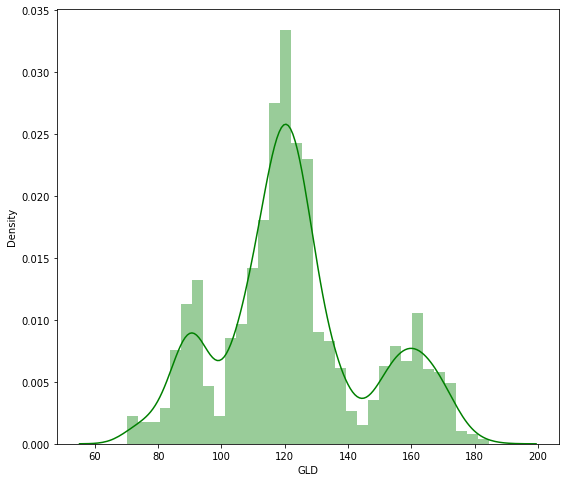

In [10]:
#mengecek distribusi harga GLD
plt.figure(figsize = (9,8))

sns.distplot(gold_data['GLD'],color='green')

# Splitting the Features and Target

Nilai Gold didrop kemudian ditambahkan pada bagian Y

In [11]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [12]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [13]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into training and test data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Model Training : Random Forest Regressor

In [15]:
regressor = RandomForestRegressor(n_estimators=100)

In [16]:
#training model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

In [17]:
test_data_prediction = regressor.predict(X_test)

In [18]:
#nilai prediksi
print(test_data_prediction)

[168.46249869  81.99189988 116.26300042 127.5288007  120.59600185
 154.6003973  150.2574983  126.15740012 117.53879865 126.26670001
 116.55560082 170.71050076 141.24839907 167.66169784 115.31230029
 117.21100069 139.08910262 169.55850046 159.79330327 156.16639941
 155.21410029 125.31900081 176.40229944 157.4932036  125.14900029
  93.91339992  77.35840031 120.42499997 119.06879944 167.5963992
  88.13680081 125.25839974  91.18150084 117.77990019 121.09689938
 136.1646009  115.52260123 115.28220065 146.39850009 107.20060136
 104.27950269  87.29009782 126.48840087 118.07059984 153.37899869
 119.65320031 108.30630003 108.08129822  93.19740038 127.16079776
  75.36840024 113.62649927 121.40660015 111.21129937 118.99019904
 120.56659975 159.31460013 168.23310134 147.27949691  85.89799891
  94.38360037  86.77299898  90.63870017 118.92320068 126.50780059
 127.43299957 168.94469978 122.29589951 117.48079878  98.54800032
 168.60910191 143.22089835 131.60930119 121.15940217 121.19069961
 119.726900

In [19]:
#mengecek tingkat kesalahan
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893688613245126


# Membandingkan harga asli dan harga prediksi

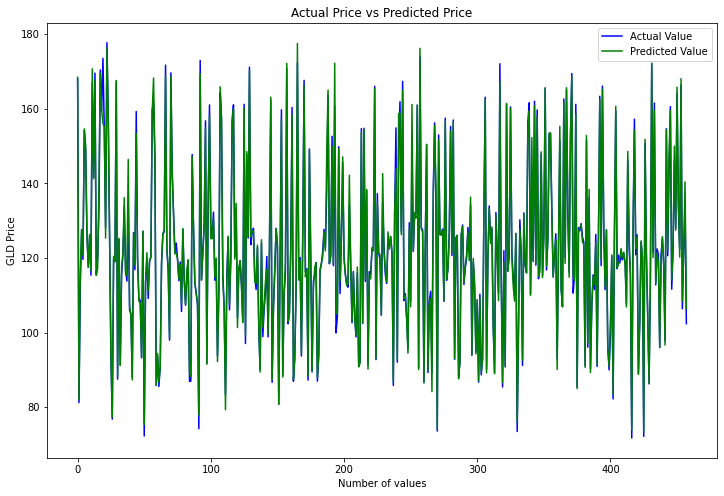

In [20]:
Y_test = list(Y_test)

plt.figure(figsize = (12,8))
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()